In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
def dateparse(x):
    if x == 'Pilot':
        x = '14/06/2017'
    return pd.datetime.strptime(x, '%d/%m/%Y')
#dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

qs = pd.read_csv('sciroom_qs.csv', skiprows=2, parse_dates=['When?'], date_parser=dateparse)

In [35]:
qs.rename(columns={'When?':'date', 'Will this be a potential talk, blog post, or nothing? ':'output_type', 
                   'Who?':'who', 'Other comments':'comments'}, inplace=True)

In [36]:
#qs["date"] = qs["date"].astype("datetime64")
qs.head()

,Name,date,Questions,output_type,comments,who
0,Przemek Ociepa,2017-06-14,"""Could machines be conscious?""",Event,Made into event 1! But what about content?,Jamal
1,Przemek Ociepa,2017-06-14,"""Are we approaching to an ecological collapse?""",Event,Loss of diversity. E.g. mass extinction,Neil
2,Philip Wiles,2017-06-14,"""Are we losing the war on disease?""",Event,Disease - illness' Medical student or (at wors...,NaN
3,Philip Wiles,2017-06-14,"""Is the nature of reality dependent on our obs...",Content: Read,Peter. At Some Point.,Peter
4,Tim Wiles,2017-06-14,"""What inventions would we not have without the...",Event / Content,Hard to make it discussiony/involving. space -...,NaN


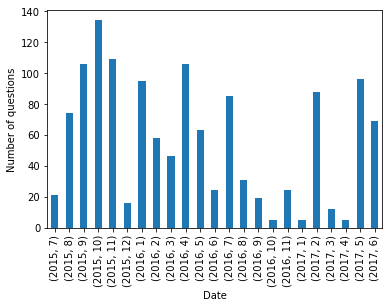

In [45]:
fig = qs[['date']].groupby([qs["date"].dt.year, qs["date"].dt.month]).count().plot(kind="bar", legend=False)
fig.set_xlabel('Date')
fig.set_ylabel('Number of questions')
plt.show()

In [80]:
# Note: to avoid selection bias, I'm going to need to classify a reasonable fraction of questions. 
# Otherwise e.g. I could just be counting the physics questions.

biology_words = ["ecological", "disease", "nature", "plants", "animals", "animal", "biology", "biological", 
                 "neurons", "cancer", "cell", "diet", "evolution", "human", "life", "zombie", "DNA",
                "species", "drunk", "nutrition", "virus", "drug", "exercise", "blood", "elephant", "bee", "cat"]
physics_words = ["space", "black hole", "star", "universe", "quantum", "physics", "radiation", "light", "moon",
                "mars", "wormhole", "turbulence", "time", "particles", "antimatter", "nuclear", "clock",
                "wavefunction", "electricity", "power", "gravity", "planet", "dimension", "gravitation", "telescope",
                "magnet", "vibrat"]
chemistry_words = ["chemicals", "chemical", "metal", "chemistry", "material", "mineral", "fracking"]
psychology_words = ["psychology", "brain", "conscious", "mind", "memory", "memories"]

In [81]:
qs['genre'] = None

for i, r in qs.iterrows():
    # first try looking at the comments 
    
    try:
        comments = r['comments'].lower()
    except AttributeError:
        comments = ''
        
    if "biolog" in comments:
        qs.set_value(i, 'genre', 'biology')
    elif "physics" in comments:
            qs.set_value(i, 'genre', 'physics')
    elif "chemist" in comments:
        qs.set_value(i, 'genre', 'chemistry')
    elif "psycholog" in comments:
        qs.set_value(i, 'genre', 'psychology')    
    else: 
        for w in biology_words:
            if w in r['Questions'].lower() + ' ' + comments:
                qs.set_value(i, 'genre', 'biology')
                break
        for w in physics_words:
            if w in r['Questions'].lower() + ' ' + comments:
                qs.set_value(i, 'genre', 'physics')
                break
        for w in chemistry_words:
            if w in r['Questions'].lower() + ' ' + comments:
                qs.set_value(i, 'genre', 'chemistry')
                break
        for w in psychology_words:
            if w in r['Questions'].lower() + ' ' + comments:
                qs.set_value(i, 'genre', 'psychology')
                break

In [82]:
qs[['Questions', 'genre']]

,Questions,genre
0,"""Could machines be conscious?""",psychology
1,"""Are we approaching to an ecological collapse?""",biology
2,"""Are we losing the war on disease?""",biology
3,"""Is the nature of reality dependent on our obs...",biology
4,"""What inventions would we not have without the...",physics
5,"""What inventions would we not have without war...",None
6,"""How can science / technology make us happier?""",psychology
7,"""What would the world be like without or with ...",physics
8,"""How do mirror neurons work?""",biology
9,"""Can a machine identify cancer cell developing...",biology
